In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline
n=0

In [4]:
data = pd.read_csv("C:\\Users\\clpan\\Downloads\\kc_house_data totalchange.csv")
data.sample(5)

,price,bedrooms,sqft_living,sqft_lot,floors,condition
2259,390000.0,3,1240,8410,1.0,5
14690,565000.0,3,4040,8653,2.0,3
5972,215000.0,4,1700,6675,2.0,3
40,625000.0,4,2570,5520,2.0,3
20690,370000.0,4,1812,5026,2.0,3


In [5]:
data.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,condition
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2079.899736,1.510697e+04,1.494309,3.409430
std,3.673622e+05,0.930062,918.440897,4.142051e+04,0.539989,0.650743
min,7.500000e+04,0.000000,290.000000,5.200000e+02,1.000000,1.000000
25%,3.219500e+05,3.000000,1427.000000,5.040000e+03,1.000000,3.000000
50%,4.500000e+05,3.000000,1910.000000,7.618000e+03,1.500000,3.000000
75%,6.450000e+05,4.000000,2550.000000,1.068800e+04,2.000000,4.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,5.000000


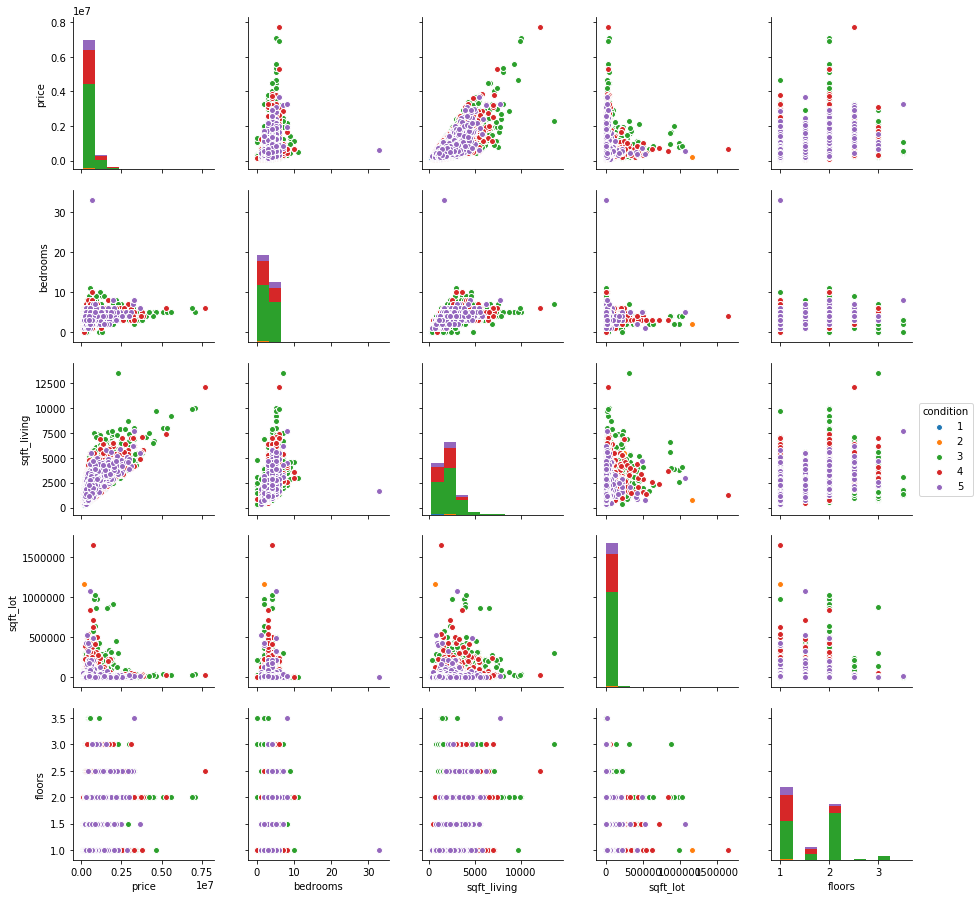

In [6]:
sns.pairplot( data=data, vars=('price','bedrooms','sqft_living','sqft_lot','floors'), hue='condition' )

In [7]:
df_norm = data[['price','bedrooms','sqft_living','sqft_lot','floors']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(5)

,price,bedrooms,sqft_living,sqft_lot,floors
20541,0.031148,0.090909,0.089811,0.000280,0.4
9576,0.026492,0.090909,0.061132,0.004856,0.0
19337,0.104918,0.090909,0.150189,0.002278,0.0
10928,0.083410,0.121212,0.136226,0.002350,0.2
20273,0.039738,0.060606,0.052075,0.000202,0.4


In [8]:
df_norm.describe()

,price,bedrooms,sqft_living,sqft_lot,floors
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.061007,0.102147,0.135087,0.008836,0.197724
std,0.048179,0.028184,0.069316,0.025091,0.215996
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032387,0.090909,0.085811,0.002738,0.000000
50%,0.049180,0.090909,0.122264,0.004300,0.200000
75%,0.074754,0.121212,0.170566,0.006159,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
target = data[['condition']].replace([1,2,3,4,5],[0,1,2,3,4])
target.sample(5)

,condition
21279,2
16962,3
16355,2
3487,2
12968,2


In [10]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,price,bedrooms,sqft_living,sqft_lot,floors,condition
5673,0.029443,0.121212,0.098868,0.008960,0.0,3
10684,0.049443,0.060606,0.070189,0.003320,0.0,2
14420,0.028197,0.090909,0.100377,0.004393,0.4,3
12937,0.038951,0.121212,0.134340,0.004930,0.4,2
13129,0.057836,0.060606,0.101887,0.001557,0.0,3


In [11]:
train_test_per = 60/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,price,bedrooms,sqft_living,sqft_lot,floors,condition,train
20600,0.051803,0.121212,0.155472,0.001987,0.4,2,True
9185,0.015082,0.060606,0.083774,0.005156,0.0,2,True
18105,0.071475,0.090909,0.173585,0.004069,0.4,2,True
11324,0.031469,0.060606,0.118491,0.003537,0.4,2,False
4775,0.022754,0.090909,0.135849,0.006970,0.0,3,True


In [12]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,price,bedrooms,sqft_living,sqft_lot,floors,condition
18567,0.057705,0.090909,0.206038,0.007065,0.4,2
17110,0.045902,0.121212,0.165283,0.002413,0.4,2
19987,0.126557,0.151515,0.323019,0.005860,0.4,2
17990,0.042610,0.090909,0.043019,0.000693,0.2,2
19445,0.054426,0.060606,0.110943,0.002865,0.0,3


In [13]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,price,bedrooms,sqft_living,sqft_lot,floors,condition
6910,0.068328,0.090909,0.108679,0.001279,0.4,2
88,0.018361,0.060606,0.099623,0.000921,0.4,3
10676,0.026623,0.090909,0.070943,0.005403,0.0,2
3505,0.045902,0.121212,0.133585,0.004858,0.0,3
10982,0.196066,0.090909,0.143396,0.004834,0.0,3


In [14]:
X = train.values[:,:5]
X[:6]

array([[0.03645902, 0.12121212, 0.12241509, 0.00271377, 0.4       ],
       [0.0557377 , 0.09090909, 0.09660377, 0.00485208, 0.        ],
       [0.16065574, 0.18181818, 0.17660377, 0.0053912 , 0.4       ],
       [0.03803279, 0.12121212, 0.19735849, 0.00263745, 0.4       ],
       [0.03868852, 0.09090909, 0.05886792, 0.00042342, 0.4       ],
       [0.16459016, 0.09090909, 0.20150943, 0.00473093, 0.        ]])

In [15]:
targets = [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,5:6]])
y[:6]

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

In [16]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594],
       [-0.12770671,  0.89795461,  0.57261197,  0.7325786 , -0.65366916]])

In [17]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.85010283,  0.20148544, -0.66405563,  0.46676034, -0.18311228],
       [ 0.05581765,  0.87514317,  0.04339224, -0.78361323, -0.68355319],
       [ 0.0904053 ,  0.04880816,  0.27522049, -0.19700911,  0.29961022],
       [-0.20619999,  0.24783223,  0.53480993, -0.64205218, -0.24884846],
       [ 0.00506612,  0.37333416, -0.4926407 ,  0.10948173,  0.24986169]])

In [18]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

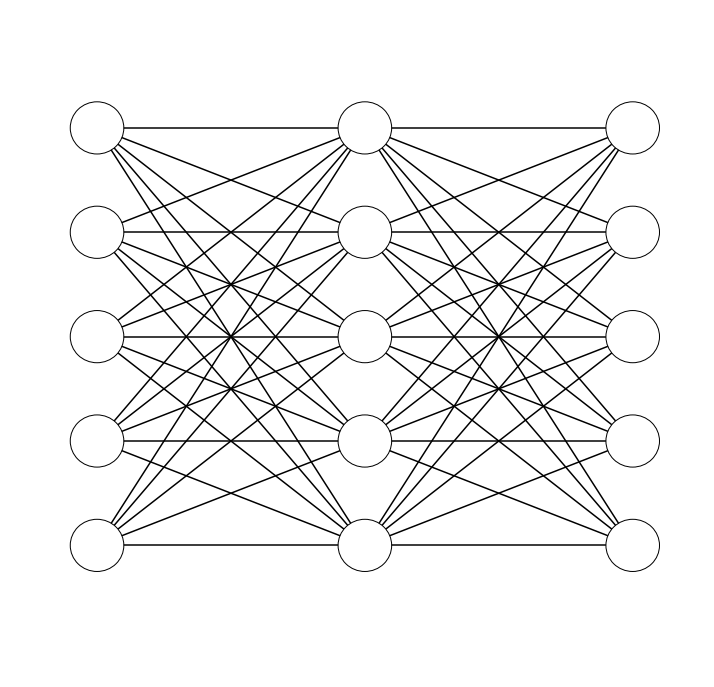

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [5, 5, 5])

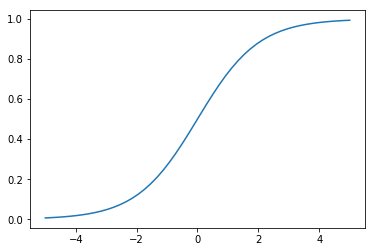

In [21]:
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [22]:
learning_rate = 0.2 # slowly update the network
for epoch in range(50000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    er = (abs(y - l2)).mean()
    l2_delta = (y - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)

Error: 0.14031332402667906


In [23]:
X = test.values[:,:5]
y = np.array([targets[int(x)] for x in test.values[:,5:6]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [24]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['condition']].replace([0,1,2,3,4], [1,2,3,4,5])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2,3,4], [1,2,3,4,5])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

       condition  Prediction
0              3           3
8              3           3
10             3           3
11             4           3
17             4           3
20             4           3
23             3           3
24             4           3
30             3           3
32             4           3
33             4           3
35             3           3
39             3           3
42             3           3
43             3           3
45             3           3
46             3           3
50             3           3
54             3           3
56             3           3
57             3           3
58             4           3
59             3           3
60             4           3
62             5           3
63             3           3
66             3           3
67             3           3
68             4           3
70             4           3
...          ...         ...
21532          3           3
21537          3           3
21539         